<a href="https://colab.research.google.com/github/irtiqamalik02/ANN-PredictCarSales/blob/master/ANNToPredictCarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#                        **ARTIFICIAL NEURAL NETWORKS TO PREDICT CAR SALES**

 
Given attributes like: Customer Name, Customer e-mail, Country, Gender, Age, Annual Salary, Credit Card Debt and Net Worth develop a model to predict the total dollar amount that customers are willing to pay.


# STAGE #0: IMPORT LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STAGE #1: IMPORT DATASET


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
car_df = pd.read_csv(io.BytesIO(uploaded['Car_Purchasing_Data.csv']), encoding='ISO-8859-1')

#Since the csv file has some special characters, so for proper decoding I am using IS0-8851-1 encoding.

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data.csv


In [ ]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,NaN,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,NaN,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,NaN,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,NaN,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,NaN,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,NaN,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,NaN,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,NaN,14013.034510,337826.6382,45442.15353


# STAGE #2: CREATE TESTING AND TRAINING DATASET/ DATA CLEANING

In [ ]:
#Drop Duplicate rows
car_df=car_df.drop_duplicates(keep='first')

In [ ]:
#Summary Statistics
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,496.000000,492.000000,498.000000,497.000000,500.000000
mean,0.506000,46.279658,62276.950495,9595.953318,431592.270274,44209.799218
std,0.500465,7.993283,11669.352061,3489.203750,173857.728118,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.987874,54489.146360,7384.385873,299734.127800,37629.896040
50%,1.000000,46.097881,63076.537125,9648.837620,427011.495400,43997.783390
75%,1.000000,51.768717,70149.497285,11792.524153,557098.963600,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


It generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. The statistics gives us the count, mean,standard deviation along with the 25th to 75th percentile of the observations.

In [ ]:
#Print a concise summary of a DataFrame
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  496 non-null    float64
 5   Annual Salary        492 non-null    float64
 6   Credit Card Debt     498 non-null    float64
 7   Net Worth            497 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 39.1+ KB


In [ ]:
#Dropping some features 
X=car_df.iloc[:,3:8].values 


'Customer Name' , 'Customer e-mail' , 'Country' and 'Car Purchase Amount' from input set are dropped since they don't help in any way to actually determine the car purchasing amount.

In [ ]:
# Handling Missing Data
from sklearn.impute import SimpleImputer
# Replacing missing values with the means of their particular columns
imputer=SimpleImputer(missing_values=np.nan , strategy='mean') 
X[:,1:8]=imputer.fit_transform(X[:,1:8])

In [ ]:
X

array([[0.00000000e+00, 4.62796581e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05],
       [0.00000000e+00, 4.62796581e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05],
       [1.00000000e+00, 4.31528975e+01, 6.22769505e+04, 1.11603551e+04,
        6.38467177e+05],
       ...,
       [1.00000000e+00, 5.39434972e+01, 6.88887780e+04, 9.59595332e+03,
        7.64531320e+05],
       [1.00000000e+00, 5.91605086e+01, 6.22769505e+04, 1.40130345e+04,
        3.37826638e+05],
       [1.00000000e+00, 4.62796581e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05]])

In [ ]:
X.shape

(500, 5)

The shape of X tells us that we have 500 datapoints and 5 inputs

In [ ]:
y = car_df.iloc[:,8:9] #output
y.shape

(500, 1)

The great difference in the scale of the numbers could cause problems during training when we will attempt to combine the values as features. In order to have better results we normalise the data using *MinMaxScaler*.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X) # normalizing input data


In [ ]:
scaler_x.data_max_ # maximum values

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [ ]:
scaler_x.data_min_ # minimum values

array([    0.,    20., 20000.,   100., 20000.])

In [ ]:
print(X_scaled) 

[[0.         0.52559316 0.53515116 0.57836085 0.22342985]
 [0.         0.52559316 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.52846188 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.47718358 0.75972584]
 [1.         0.78321017 0.52846188 0.69914746 0.3243129 ]
 [1.         0.52559316 0.51713347 0.46690159 0.45198622]]


 The input data is now scaled to a fixed range (0 to 1). This is done so that we will end up with smaller standard deviations, which can suppress the effect of outliers.

In [ ]:
X_scaled.shape #The shape of input matrix remains unaffected

(500, 5)

In [ ]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y) # Data normalization

# STAGE #3: VISUALIZE DATASET ( EDA)


In [ ]:
# Sort with respect to Annual Salary 
cars_sort=car_df.sort_values(by='Annual Salary',ascending= False).head()
cars_sort.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.00000,17452.921790,188032.0778,58350.31809
342,"Flores, Caldwell U.",ut@Etiamvestibulum.ca,Western Sahara,0,40.752195,92471.17612,5404.397644,515717.7476,59096.26978
465,Vaughan,Aliquam@aaliquet.com,Ukraine,0,51.441981,92455.72807,9877.169366,285326.3544,61404.22578
370,"Daugherty, Veda M.",venenatis.vel.faucibus@iaculisnec.net,Guinea,1,48.308673,91083.73918,13148.855970,387538.2487,60960.83428
96,Glenna Graham,sodales@maurisSuspendisse.com,Bolivia,0,46.245735,90556.62686,13872.566700,479586.9387,61593.52058


Here, I sorted the data in descending order with respect to the 'Annual Salary', which is going to be our target variable in our modelling exercise. It gives us an insight as to what is the maximum salary and then corresponding to it what is the value of other observations. It helps in making some critical decisions in the modelling stage.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   3.,  31.,  57., 105., 138., 106.,  35.,  13.,   3.]),
 array([ 20000.,  28000.,  36000.,  44000.,  52000.,  60000.,  68000.,
         76000.,  84000.,  92000., 100000.]),
 <a list of 10 Patch objects>)

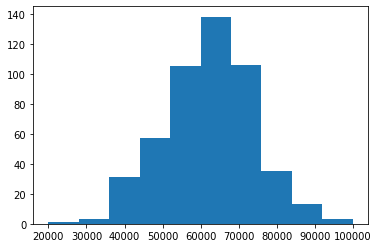

In [ ]:
#Histogram 
plt.hist(car_df['Annual Salary'],10)

I used 10 bins in the histograms plot to inspect the underlying frequency distribution (eg. Normal distribution), outliers, skewness, etc. The histogram shows some observations are to the extreme left and different from the rest (i.e. Fat Tail). Hence, these need to be removed for better results.

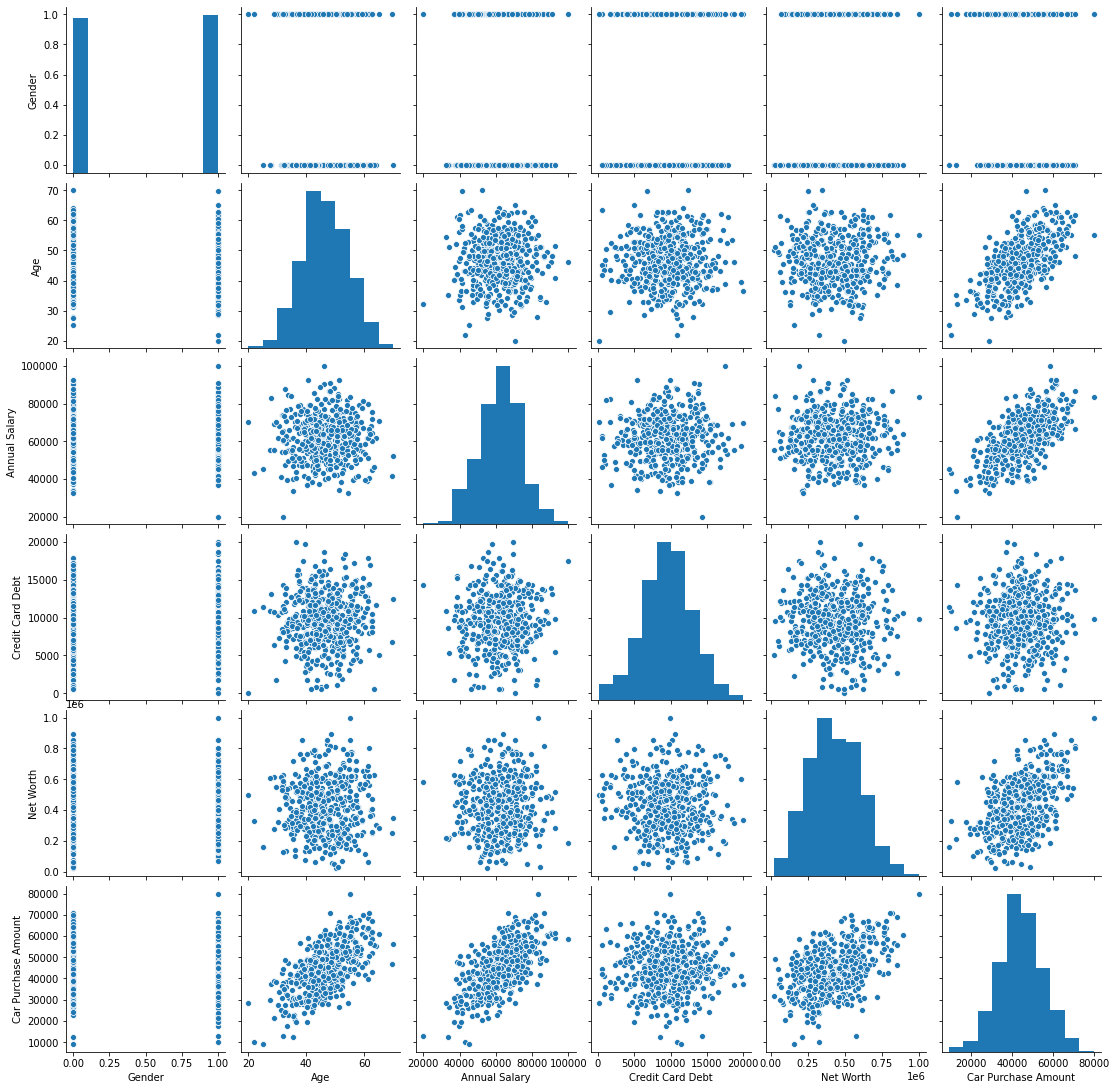

In [ ]:
sns.pairplot(car_df) # Plot pairwise relationships in our dataset(create the default pairplot)


**Checking correlation in visual form using pairplots**: The default pairs plot in seaborn only plots numerical columns and often gives us valuable insights. Since the output is 'Car Purchase Amount' so that is what we are concerned with (refer to the last row of the plot above):

*   There is a positive correlation between ' Age ' & ' Car Purchase Amount ' and ' Annual Salary ' & ' Car Purchase Amount ' i.e. as age and annual salary go up, so does the car purchase amount.

*   There seems to be no clear relationship between the ' 
Credit Card Debt ' and ' Car Purchase Amount ' from the plot.


*   ' Net Worth ' (i.e. assests - liabilities) and ' Car Purchase Amount ' are also positively correlated showing that people with a higher net worth tend to spend more money while buying a car.


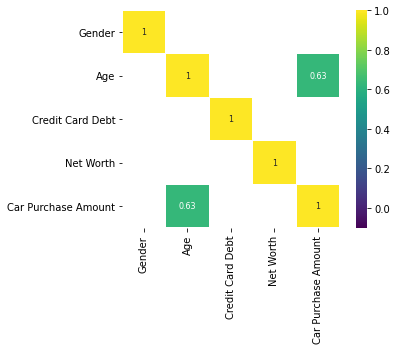

In [ ]:
#Heatplot
corr=car_df.drop('Annual Salary',axis=1).corr()
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],cmap='viridis',vmax=1.0,vmin=-0.1,linewidths=0.1,annot=True, annot_kws={"size":8},square=True);

Here, I set the threshold such that anything greater than 0.5 is significant . The heatmap shows different colors only where we have significant correlation (here > 0.5). The vertical bar on the right side depicts which colors corresponds to a particular value of correlation and white colored boxes represent no correlation between the variables. It helps in feature selection.

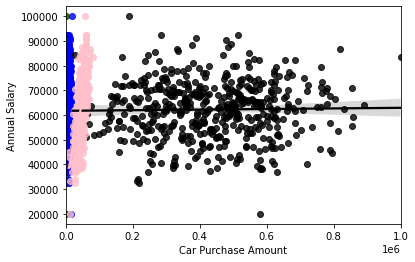

In [ ]:
#Regression Plots
sns.regplot(car_df['Gender'],car_df['Annual Salary'], color='red')
sns.regplot(car_df['Age'],car_df['Annual Salary'], color='green')
sns.regplot(car_df['Credit Card Debt'],car_df['Annual Salary'], color='blue')
sns.regplot(car_df['Net Worth'],car_df['Annual Salary'], color='black')
sns.regplot(car_df['Car Purchase Amount'],car_df['Annual Salary'], color='pink')

Here , the values lying closer to the regression line are considered as good varibales i.e. they help in making a better model for training.


# STAGE #4: CREATING AND TRAINING THE MODEL

In [ ]:
# Dividing the dataset into training and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)


**Building the Artificial Neural Network in a Sequential Form**

In [ ]:
import tensorflow.keras
from keras.models import Sequential #for a sequential ANN
from keras.layers import Dense #for building a fully connected ANN
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu')) # Input layer with 25 neurons in the ANN
model.add(Dense(25, activation='relu')) #Hidden layer with 25 nerons and ReLU activation function
model.add(Dense(1, activation='linear')) # Output Layer with linear actiavtion function
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


**Training the Artificial Neural Network**

In [ ]:
#Compile the Keras Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Fit the model to training data
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2) 



Train on 300 samples, validate on 75 samples
Epoch 1/100
300/300 [==============================] - 0s 460us/step - loss: 0.2863 - val_loss: 0.2291
Epoch 2/100
300/300 [==============================] - 0s 48us/step - loss: 0.2013 - val_loss: 0.1527
Epoch 3/100
300/300 [==============================] - 0s 49us/step - loss: 0.1347 - val_loss: 0.0959
Epoch 4/100
300/300 [==============================] - 0s 43us/step - loss: 0.0845 - val_loss: 0.0550
Epoch 5/100
300/300 [==============================] - 0s 41us/step - loss: 0.0489 - val_loss: 0.0281
Epoch 6/100
300/300 [==============================] - 0s 41us/step - loss: 0.0266 - val_loss: 0.0151
Epoch 7/100
300/300 [==============================] - 0s 41us/step - loss: 0.0169 - val_loss: 0.0126
Epoch 8/100
300/300 [==============================] - 0s 39us/step - loss: 0.0152 - val_loss: 0.0136
Epoch 9/100
300/300 [==============================] - 0s 39us/step - loss: 0.0155 - val_loss: 0.0136
Epoch 10/100
300/300 [==============

After a fair amount of hit and trials, I realised that by using 100 epochs and a batch size of 50, I've been able to achieve minimal loss.

# STAGE #5: EVALUATING THE MODEL 

Visualizing how the training has been changing over the number of epochs.

In [ ]:
#The returned object holds a record of the loss values and metric values during training
print(epochs_hist.history.keys()) 


dict_keys(['val_loss', 'loss'])


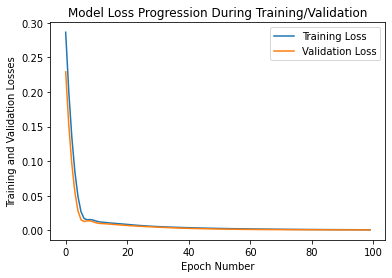

In [ ]:
#Plot the Model Loss during training
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


From the graph it can be inferred that the drop in error is significant within the first 10 epochs and then further improvements were very minor.

**Predicting Outputs:**

In [ ]:
# The input array will take input as : Gender, Age, Annual Salary, Credit Card Debt, Net Worth 
# Data should be normalized
X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]]) 
y_predict_sample = model.predict(X_test_sample)
print('Predicted Purchase Amount(Normalized)=', y_predict_sample)
y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount ($)=', y_predict_sample_orig)


Predicted Purchase Amount(Normalized)= [[0.38531983]]
Expected Purchase Amount ($)= [[36357.707]]


**Result:** Using this model and based on the information provided by the customer, the amount that the customer would spend on buying a car can be predicted. This can be used for targeted marketing by showing the particular customer cars from a specific range since that's what they are most likely to buy. It will help improve marketing strategies and audience experiences, builds brand awareness and loyalty, and even leads to better products and services.